In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

%matplotlib inline

<b> Загрузка данных и предобработка

In [166]:
data_train = pd.read_csv('mnist/mnist_train.csv')
data_test = pd.read_csv('mnist/mnist_test.csv')

In [167]:
X_train = data_train.iloc[:,1:]
X_test = data_test.iloc[:,1:]

X_train = X_train / 255.0
X_test = X_test / 255.0

In [168]:
Y_train = pd.get_dummies(data_train.label)

In [169]:
X_train = X_train.values.reshape(-1,28,28,1)

In [170]:
X_train.shape

(60000, 28, 28, 1)

In [171]:
X_test = X_test.values.reshape(-1,28,28,1)

In [173]:
X_test.shape

(10000, 28, 28, 1)

<b> Строим модель с помощью оболочки Keras

In [161]:
model = models.Sequential()

model.add(layers.Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', \
                 activation ='relu', input_shape = (28,28,1)))
model.add(layers.Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', \
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', \
                 activation ='relu'))
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', \
                 activation ='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation = "softmax"))

In [162]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)             

In [175]:
optimizer = Adam(lr=0.0001, epsilon=1e-08, decay=0.0)

In [176]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [177]:
model.fit(X_train, Y_train, batch_size = 100, epochs = 2)

Epoch 1/2
600/600 [==============================] - 105s 174ms/step - loss: 0.3613 - accuracy: 0.8949
Epoch 2/2
600/600 [==============================] - 103s 172ms/step - loss: 0.0854 - accuracy: 0.9740


<b> Считаем предсказания на тестовой выборке и считаем ошибку

In [178]:
pred = model.predict(X_test)

In [179]:
pred = np.argmax(pred,axis=1)

In [180]:
np.mean(pred == data_test.label.values)

0.982

<b> Визуализация слоёв свёрточной сети (just for fun)

In [181]:
l1 = model.layers[0]

In [182]:
l2 = model.layers[1]

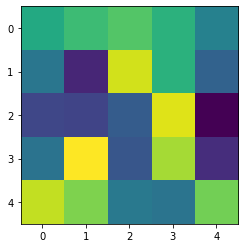

In [183]:
# Визуализация одного из фильтров 1-го слоя

plt.imshow(l1.variables[0][:,:,0,1])

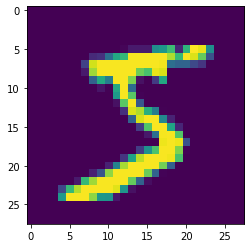

In [193]:
# Берем первый элемент из выборки

p = X_train[0]
plt.imshow(p[:,:,0])
plt.show()

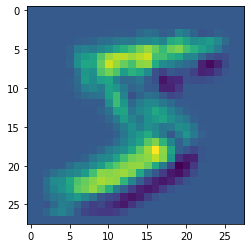

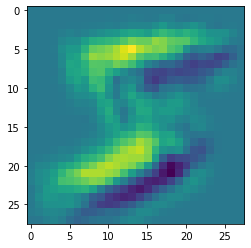

In [194]:
# Визуализация исходной картинки после 1-й и 2-й свёртки

fil = l1.variables[0][:,:,0,20]
fil2 = l2.variables[0][:,:,0,15]

res = np.zeros([28,28])

inp = np.zeros([32,32])
inp[2:-2,2:-2] = p[:,:,0]

for i in range(28):
    for j in range(28):
        res[i,j] = np.sum(inp[i:i+5,j:j+5]*fil)

res2 = np.zeros([28,28])

inp = np.zeros([32,32])
inp[2:-2,2:-2] = res[:,:]

for i in range(28):
    for j in range(28):
        res2[i,j] = np.sum(inp[i:i+5,j:j+5]*fil)
        
plt.imshow(res)
plt.show()
plt.imshow(res2)
plt.show()